In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix

2024-02-22 16:33:18.077076: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-22 16:33:18.574733: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-22 16:33:18.574851: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-22 16:33:18.655475: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-22 16:33:18.833738: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-22 16:33:18.838640: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [16]:
data = pd.read_csv('Rice_Cammeo_Osmancik.csv')
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity\t,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [18]:
data = data.replace(['Cammeo','Osmancik'] ,[0,1])

In [34]:
x = data.drop(data.columns[7], axis=1)
y = data.iloc[:,7]

x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=.2, random_state=45)

In [36]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [38]:
model = Sequential()
model.add(Dense(7,activation='sigmoid'))
model.add(Dense(3,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [40]:
model.compile(optimizer='sgd',loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
96/96 [==============================] - 1s 3ms/step - loss: 0.7372 - accuracy: 0.4222 - val_loss: 0.6990 - val_accuracy: 0.4501
Epoch 2/50
96/96 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.4741 - val_loss: 0.6748 - val_accuracy: 0.8530
Epoch 3/50
96/96 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.7497 - val_loss: 0.6645 - val_accuracy: 0.5853
Epoch 4/50
96/96 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.5837 - val_loss: 0.6585 - val_accuracy: 0.5499
Epoch 5/50
96/96 [==============================] - 0s 2ms/step - loss: 0.6504 - accuracy: 0.5778 - val_loss: 0.6537 - val_accuracy: 0.5499
Epoch 6/50
96/96 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.5778 - val_loss: 0.6489 - val_accuracy: 0.5499
Epoch 7/50
96/96 [==============================] - 0s 2ms/step - loss: 0.6392 - accuracy: 0.5778 - val_loss: 0.6439 - val_accuracy: 0.5499
Epoch 8/50
96/96 [==

Matplotlib is building the font cache; this may take a moment.


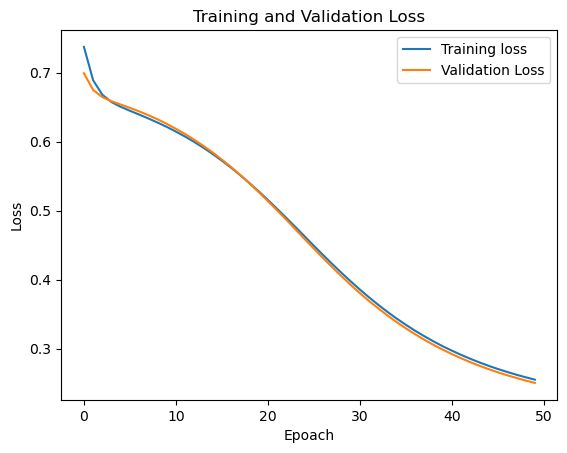

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoach')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [46]:
y_pred = model.predict(x_test)
y_pred = [0 if val <0.5 else 1 for val in y_pred]
accuracy_score(y_test, y_pred)

24/24 [==============================] - 0s 1ms/step


0.9251968503937008

In [48]:
model.save('rice sigmoid')

INFO:tensorflow:Assets written to: rice sigmoid/assets


INFO:tensorflow:Assets written to: rice sigmoid/assets


In [50]:
matrix = confusion_matrix(y_test, y_pred)

In [52]:
matrix

array([[307,  36],
       [ 21, 398]])